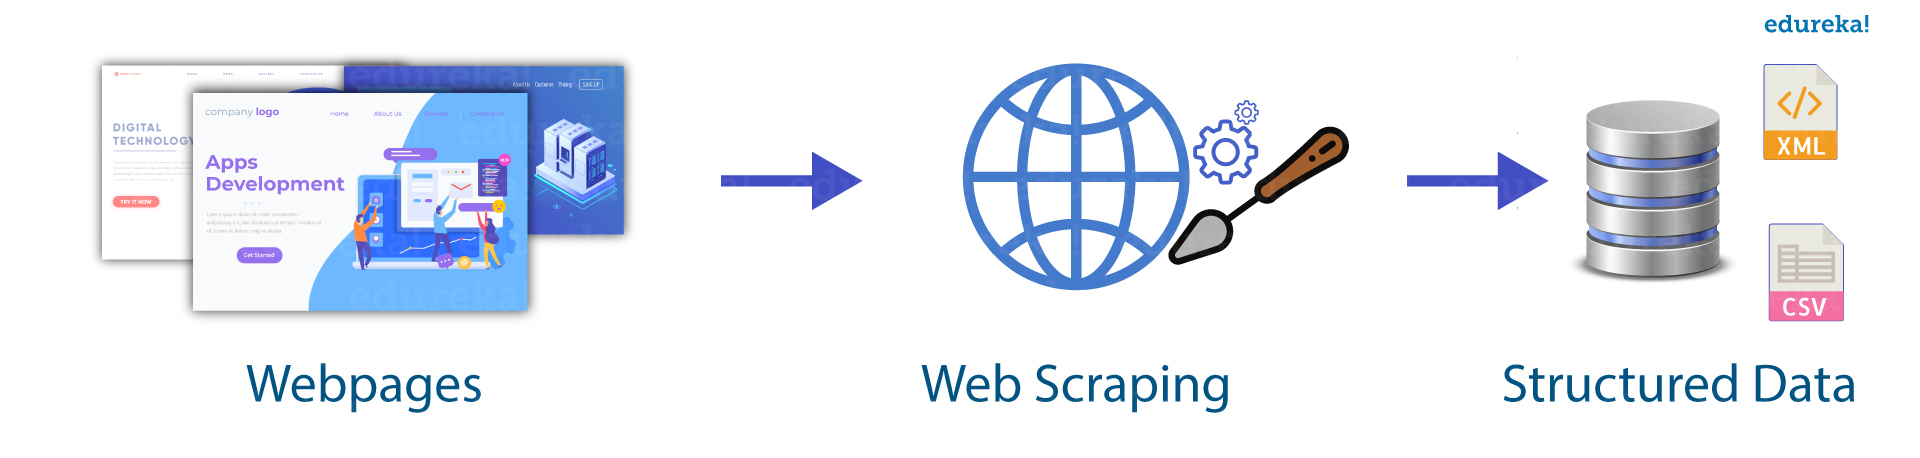

**Web Scrapping** also known as Web data extraction is the method or technique used to extract large amount of data from the website to our local computer in the form of table in spreadsheet format.
In the process below, the top 250 movies of imdb has been extracted and stored in our local storage. 

**How Do You Scrape Data From A Website?**
When you run the code for web scraping, a request is sent to the URL that you have mentioned. 
As a response to the request, the server sends the data and allows you to read the HTML or XML page. 
The code then, parses the HTML or XML page, finds the data and extracts it. 

To extract data using web scraping with python, you need to follow these basic steps:

<ol>
<li>
Find the URL that you want to scrape
<li>Inspecting the Page
<li>Find the data you want to extract
<li>Write the code
<li>Run the code and extract the data
<li>Store the data in the required format </ol>

# 1. Import the Required libraries

In [19]:
#Libraries for Data Manipulation
import pandas as pd
import numpy as np

#library for requesting url/ making HTTP requests 
import requests as rq
import openpyxl
#Beautiful Soup is a Python package for parsing HTML and XML documents.
from bs4 import BeautifulSoup

# 2. Define and request the url from which the data is to be extracted and also defined the soup 

In [2]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

In [3]:
url = "https://www.imdb.com/india/top-rated-indian-movies/"

html = rq.get(url,headers=headers)

#An HTMLParser instance is fed HTML data and calls handler methods when start tags, end tags, text, comments, and other markup elements are encountered. The user should subclass HTMLParser and override its methods to implement the desired behavior
soup = BeautifulSoup(html.text,"html.parser")

In [4]:
type(soup)

bs4.BeautifulSoup

# As the vaious movie of Imdb are enclosed in a *div* tag. We create a container that will consider and include all those movies inside that container

In [5]:
#creating a container which search the html file and include the div with the class: lister-item mode-advanced
movie_containers = soup.find_all('li',{'class':"ipc-metadata-list__item ipc-metadata-list__item--inline ipc-metadata-list-item--link"})

#print the number of container that is being shown in the page
print(len(movie_containers))

#It would display 50 as the number of movie that is being shown in the page

250


# Now we try to access the various data in the movie_container. 
Let's Begin with the first_movie and try to access the various data that we want to extract

In [89]:
first_movie = movie_containers[0]
for movie in first_movie.find_all(attrs={"aria-label": True}):
    title = movie["aria-label"]
print(title)
    

1. Ramayana: The Legend of Prince Rama


In [97]:
#Extracting ratings from the <span> tag and converting it into int
rank=first_movie.find('span',{'class':"sc-9910edf6-5 lkKLti"})
rank=int(rank.text)

In [96]:
rank

1

In [10]:
#Extracting ratings from the <strong> tag and converting it into float
imdb_ratings1 = first_movie.find('span',{'class':"ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating"})
imdb_ratings1 = float(imdb_ratings1.text)

In [45]:
imdb_ratings1 

9.2

# Creating an excel file using Python openpyxl module

In [ ]:
# Call a Workbook() function of openpyxl 
# to create a new blank Workbook object
excel=openpyxl.Workbook()
# Get workbook active sheet  
# from the active attribute
sheet=excel.active
sheet.title='Top Rated Movies'
sheet.append(['Rank','Movie Name','IMDB Rating'])

# Now we loop within the vaious movies in the movie_container using the **for** loop

In [39]:
#creating empty list
ranks = []
movie_titles = []
imdb_ratings = []
for container in movie_containers:
    for movie in container.find_all(attrs={"aria-label": True}):
        title = movie["aria-label"]
    movie_title=remove_rank_from_movie_name(title)
    movie_titles.append(movie_title)
    #append is used to add all the rank of the movies in the list
    rank=container.find('span',{'class':"sc-9910edf6-5 lkKLti"})
    rank=int(rank.text)
    ranks.append(rank)  
    #Extracting ratings from the <strong> tag and converting it into float
    imdb_rating = container.find('span',{'class':"ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating"})
    imdb_rating = float(imdb_rating.text)
    imdb_ratings.append(imdb_rating)
    sheet.append([rank,movie_title,imdb_rating])

In [40]:
# the save() workbook method.
excel.save("imdb_ratings.xlsx")

 # Now, by using pandas we create a table by using Dataframe from the list mentioned above.


In [41]:
imdb = pd.DataFrame({
    'Rank' : ranks,
    'Movie' : movie_titles,
    'IMDB' : imdb_ratings
    })

In [42]:
imdb

,Rank,Movie,IMDB
0,1,Ramayana: The Legend of Prince Rama,9.2
1,2,Rocketry: The Nambi Effect,8.7
2,3,Nayakan,8.6
3,4,Gol Maal,8.5
4,5,Anbe Sivam,8.6
...,...,...,...
245,246,Kai Po Che!,7.8
246,247,Poove Unakkaga,8.6
247,248,Raazi,7.7
248,249,Dasvidaniya,7.8


In [43]:
print(imdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    250 non-null    int64  
 1   Movie   250 non-null    object 
 2   IMDB    250 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB
None
